In [280]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations
from scipy.stats import ttest_ind

pd.set_option('display.max_rows', 50) # показывать больше строк
pd.set_option('display.max_columns', 50) # показывать больше колонок

stud_math = pd.read_csv('stud_math.csv')

In [281]:
stud_math = stud_math.dropna(subset=['score'])
stud_math = stud_math.loc[stud_math['Fedu']<=4]
stud_math = stud_math.loc[stud_math['famrel']>=1]
stud_math = stud_math.loc[stud_math['absences']<100]

In [282]:
def for_num_col(x):
    display(x.hist())
    display(x.describe())
    IQR = x.quantile(0.75) - x.quantile(0.25)
    perc25 = x.quantile(0.25)
    perc75 = x.quantile(0.75)
    print('25-й перцентиль: {},'.format(perc25),'75-й перцентиль: {},'.format(perc75),'IQR: {},'.format(IQR))
    print('Границы выбросов = [{f}, {i}]'.format(f=perc25 - 1.5*IQR, i=perc75 + 1.5*IQR))

In [283]:
def for_obj_col(col):
    x = pd.DataFrame(stud_math[col].value_counts())
    display(x)
    display(f'Количество непустых значений = {stud_math[col].count()}')
    display(x.plot(kind='bar', grid=True))
    fig, ax = plt.subplots()
    sns.boxplot(x=col, y='score', data=stud_math, ax=ax)

In [284]:
def for_medu(x):
    y = pd.isna(x).copy()
    if True in y:
        indexes = list(y[y==True].index)
    
        x.loc[indexes] = stud_math['Fedu'].loc[indexes]
    return x

In [285]:
display(stud_math.head())
display(stud_math.info())
display(stud_math.index)
stud_math.corr()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,NaN,A,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,0.0,yes,no,no,no,yes,-6.0,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,NaN,1.0,1.0,at_home,other,course,father,1.0,2.0,0.0,no,yes,no,no,no,-6.0,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,other,mother,1.0,2.0,3.0,yes,no,NaN,no,yes,-6.0,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,NaN,home,mother,1.0,3.0,0.0,no,yes,yes,yes,yes,-9.0,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,home,father,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0


<class 'pandas.core.frame.DataFrame'>
Int64Index: 326 entries, 0 to 394
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   school               326 non-null    object 
 1   sex                  326 non-null    object 
 2   age                  326 non-null    int64  
 3   address              315 non-null    object 
 4   famsize              305 non-null    object 
 5   Pstatus              286 non-null    object 
 6   Medu                 323 non-null    float64
 7   Fedu                 326 non-null    float64
 8   Mjob                 309 non-null    object 
 9   Fjob                 298 non-null    object 
 10  reason               312 non-null    object 
 11  guardian             298 non-null    object 
 12  traveltime           303 non-null    float64
 13  studytime            321 non-null    float64
 14  failures             307 non-null    float64
 15  schoolsup            317 non-null    obj

None

Int64Index([  0,   1,   2,   3,   4,   5,   6,   7,   9,  10,
            ...
            384, 385, 386, 387, 388, 389, 391, 392, 393, 394],
           dtype='int64', length=326)

,age,Medu,Fedu,traveltime,studytime,failures,"studytime, granular",famrel,freetime,goout,health,absences,score
age,1.000000,-0.136212,-0.152193,0.058353,-0.022678,0.207081,0.022678,0.043593,-0.005886,0.071914,-0.068218,0.156020,-0.140704
Medu,-0.136212,1.000000,0.646074,-0.176069,0.082133,-0.216631,-0.082133,-0.026251,0.006937,0.076158,-0.089392,0.121282,0.196428
Fedu,-0.152193,0.646074,1.000000,-0.177698,-0.000993,-0.253871,0.000993,-0.031771,-0.021535,0.029861,0.003556,0.068245,0.114783
traveltime,0.058353,-0.176069,-0.177698,1.000000,-0.124884,0.057635,0.124884,-0.068163,0.004435,0.005552,-0.009418,-0.053346,-0.066046
studytime,-0.022678,0.082133,-0.000993,-0.124884,1.000000,-0.140379,-1.000000,0.022171,-0.133785,-0.063228,-0.089897,-0.052871,0.112442
failures,0.207081,-0.216631,-0.253871,0.057635,-0.140379,1.000000,0.140379,0.009987,0.104404,0.089372,0.068994,0.075616,-0.308892
"studytime, granular",0.022678,-0.082133,0.000993,0.124884,-1.000000,0.140379,1.000000,-0.022171,0.133785,0.063228,0.089897,0.052871,-0.112442
famrel,0.043593,-0.026251,-0.031771,-0.068163,0.022171,0.009987,-0.022171,1.000000,0.165330,0.075385,0.104556,-0.034564,0.044338
freetime,-0.005886,0.006937,-0.021535,0.004435,-0.133785,0.104404,0.133785,0.165330,1.000000,0.285416,0.091918,-0.021286,0.016692
goout,0.071914,0.076158,0.029861,0.005552,-0.063228,0.089372,0.063228,0.075385,0.285416,1.000000,-0.017440,0.052101,-0.142237


<AxesSubplot:>

count    326.000000
mean      16.684049
std        1.267896
min       15.000000
25%       16.000000
50%       17.000000
75%       18.000000
max       22.000000
Name: age, dtype: float64

25-й перцентиль: 16.0, 75-й перцентиль: 18.0, IQR: 2.0,
Границы выбросов = [13.0, 21.0]


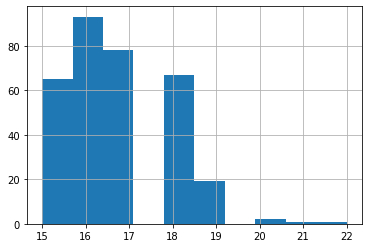

In [286]:
for_num_col(stud_math['age'])

# Столбец возраста:
Пропуски отсутствуют. Основная масса учеников в возрасте от 15 до 18 лет.
Есть незначительное число выбросов: те кто старше 21. Не вижу необходимости их удалять

<AxesSubplot:>

count    326.000000
mean       2.766871
std        1.095841
min        0.000000
25%        2.000000
50%        3.000000
75%        4.000000
max        4.000000
Name: Medu, dtype: float64

25-й перцентиль: 2.0, 75-й перцентиль: 4.0, IQR: 2.0,
Границы выбросов = [-1.0, 7.0]


array([4., 1., 3., 2., 0.])

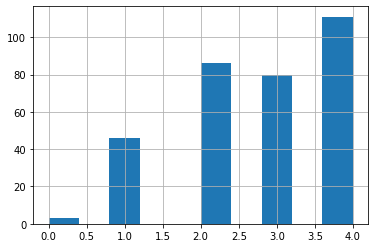

In [287]:

for_medu(stud_math['Medu']) #Заменили пропуски на такие же значения в столбце образования отца, т.к. между ними высокая корреляция
for_num_col(stud_math['Medu'])
stud_math['Medu'].unique()

# Столбец образования матери:
Есть 3 пропущеных значения. Видно что у большинства учеников матери достаточно образованны. У трети - имеют высшее образвание.
Выбросов и сомнительных значений нет.

<AxesSubplot:>

count    326.000000
mean       2.521472
std        1.088895
min        0.000000
25%        2.000000
50%        2.000000
75%        3.000000
max        4.000000
Name: Fedu, dtype: float64

25-й перцентиль: 2.0, 75-й перцентиль: 3.0, IQR: 1.0,
Границы выбросов = [0.5, 4.5]


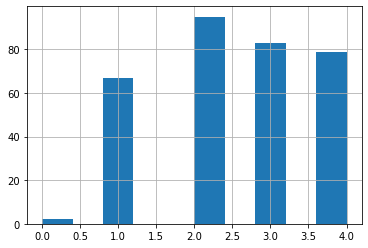

In [288]:
for_num_col(stud_math['Fedu'])


# Столбец образования отца:
Есть около 20 пропущеных значений. Также есть выбросы, из-за которых на графике сложно детально рассмотреть распределение признака. Необходимо предварительно удалить значения больше 4 и повторно пострить график.
Как видим образованиеу отцов в среднем ниже чем у матерей.

<AxesSubplot:>

count    303.000000
mean       1.465347
std        0.708010
min        1.000000
25%        1.000000
50%        1.000000
75%        2.000000
max        4.000000
Name: traveltime, dtype: float64

25-й перцентиль: 1.0, 75-й перцентиль: 2.0, IQR: 1.0,
Границы выбросов = [-0.5, 3.5]


array([2., 1., 3., 4.])

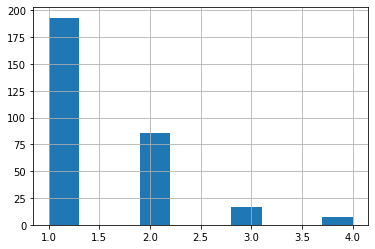

In [289]:
for_num_col(stud_math['traveltime'])
stud_math['traveltime'] = stud_math['traveltime'].apply(lambda x: 1 if pd.isna(x) else x)
stud_math['traveltime'].unique()

# Столбец времени пути до школы:
Есть около 30 пропусков, что составляет чуть менее 10% от общего количества значений. Не является критичным такое количество пропусков. Исходя из формулы, выбросы присутствуют, однако руководствуясь пояснительной таблицей видим что значения до 4 являются допустимыми, ничего удалять не нужно. В дальнейшем будем считать что выбросов нет если значения в рамках предусмотренных таблицей. По графику видно что большинство детей живет в 15 минутах ходьбы до школы. Дольше часа до школы добираются единицы учеников.

<AxesSubplot:>

count    321.000000
mean       2.031153
std        0.854562
min        1.000000
25%        1.000000
50%        2.000000
75%        2.000000
max        4.000000
Name: studytime, dtype: float64

25-й перцентиль: 1.0, 75-й перцентиль: 2.0, IQR: 1.0,
Границы выбросов = [-0.5, 3.5]


array([2., 3., 1., 4.])

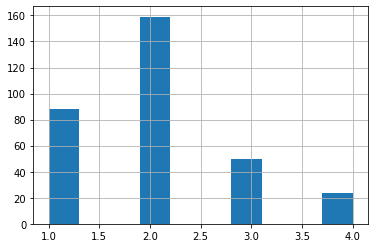

In [290]:
for_num_col(stud_math['studytime'])
stud_math['studytime'] = stud_math['studytime'].apply(lambda x: 2 if pd.isna(x) else x)
stud_math['studytime'].unique()

# Столбец времени на учебу вне школы в неделю:
Есть немного пропусков. Выбросов нет. Из графика видно что большинство учеников проводят меньше 5 часов в неделю на учебу вне школы, и лишь немногая часть (около 25 человек) - больше 10 часов.

<AxesSubplot:>

count    307.000000
mean       0.315961
std        0.728396
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        3.000000
Name: failures, dtype: float64

25-й перцентиль: 0.0, 75-й перцентиль: 0.0, IQR: 0.0,
Границы выбросов = [0.0, 0.0]


array([0., 3., 1., 2.])

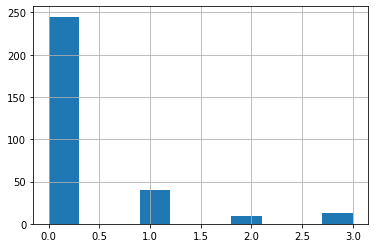

In [291]:
for_num_col(stud_math['failures'])
stud_math['failures'] = stud_math['failures'].apply(lambda x: 1 if pd.isna(x) else x)
stud_math['failures'].unique()

# Столбец внешкольных неудач:
Есть около 20 пропусков. Выбросов нет. Подавляющее большинство учеников не имеет проблем вне школы.

<AxesSubplot:>

count    321.000000
mean      -6.093458
std        2.563686
min      -12.000000
25%       -6.000000
50%       -6.000000
75%       -3.000000
max       -3.000000
Name: studytime, granular, dtype: float64

25-й перцентиль: -6.0, 75-й перцентиль: -3.0, IQR: 3.0,
Границы выбросов = [-10.5, 1.5]


array([ -6.,  -9.,  -3., -12.])

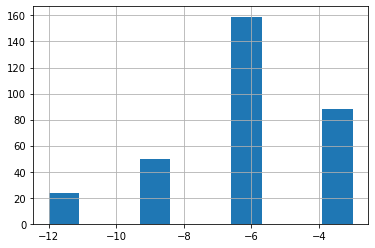

In [292]:
for_num_col(stud_math['studytime, granular'])
stud_math['studytime, granular'] = stud_math['studytime, granular'].apply(lambda x: -6 if pd.isna(x) else x)
stud_math['studytime, granular'].unique()

<AxesSubplot:>

count    326.000000
mean       3.953988
std        0.905215
min        1.000000
25%        4.000000
50%        4.000000
75%        5.000000
max        5.000000
Name: famrel, dtype: float64

25-й перцентиль: 4.0, 75-й перцентиль: 5.0, IQR: 1.0,
Границы выбросов = [2.5, 6.5]


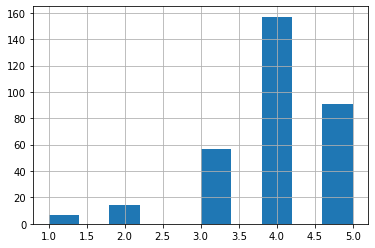

In [293]:
for_num_col(stud_math['famrel'])


# Столбец отношений внутри семьи:
Присутствуют пропуски (менее 30). Выбросов нет. Как видно у большинства отношения в семье хорошие. Лишь около 10% учеников имеют проблемы внутри семьи.

<AxesSubplot:>

count    319.000000
mean       3.210031
std        1.004593
min        1.000000
25%        3.000000
50%        3.000000
75%        4.000000
max        5.000000
Name: freetime, dtype: float64

25-й перцентиль: 3.0, 75-й перцентиль: 4.0, IQR: 1.0,
Границы выбросов = [1.5, 5.5]


array([3., 2., 4., 1., 5.])

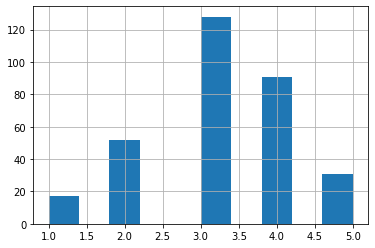

In [294]:
for_num_col(stud_math['freetime'])
stud_math['freetime'] = stud_math['freetime'].apply(lambda x: 3 if pd.isna(x) else x)
stud_math['freetime'].unique()

# Столбец свободного времени у учеников:
Пропусков мало (около 10). Выбросов нет. В целом средние показатели у большинства учащихся. Лишь у единиц почти нет свободного времени. 

<AxesSubplot:>

count    319.000000
mean       3.081505
std        1.098714
min        1.000000
25%        2.000000
50%        3.000000
75%        4.000000
max        5.000000
Name: goout, dtype: float64

25-й перцентиль: 2.0, 75-й перцентиль: 4.0, IQR: 2.0,
Границы выбросов = [-1.0, 7.0]


array([4., 3., 2., 1., 5.])

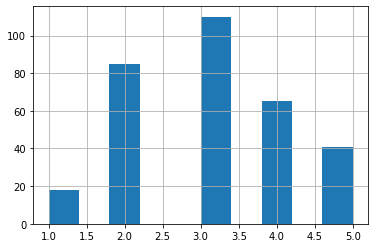

In [295]:
for_num_col(stud_math['goout'])
stud_math['goout'] = stud_math['goout'].apply(lambda x: 3 if pd.isna(x) else x)
stud_math['goout'].unique()

# Столбец проведения времени с друзьями:
Пропусков мало. Выбросов нет. Опять средние показатели, крайне мало учеников не проводят достаточно времени с друзьями.

<AxesSubplot:>

count    313.000000
mean       3.472843
std        1.391387
min        1.000000
25%        3.000000
50%        4.000000
75%        5.000000
max        5.000000
Name: health, dtype: float64

25-й перцентиль: 3.0, 75-й перцентиль: 5.0, IQR: 2.0,
Границы выбросов = [0.0, 8.0]


array([3., 5., 1., 2., 4.])

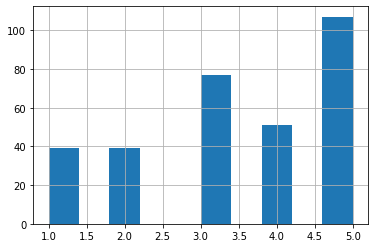

In [296]:
for_num_col(stud_math['health'])
stud_math['health'] = stud_math['health'].apply(lambda x: 4 if pd.isna(x) else x)
stud_math['health'].unique()

# Столбец здоровья:
Пропусков около 15. Выбросов нет. Больше трети учеников абсолютно здоровы. Явные проблемы со здоровьем примерно у четверти учеников, считаю это многовато. У остальных средние показатели.

<AxesSubplot:>

count    326.000000
mean       5.576687
std        7.410093
min        0.000000
25%        0.000000
50%        4.000000
75%        8.000000
max       56.000000
Name: absences, dtype: float64

25-й перцентиль: 0.0, 75-й перцентиль: 8.0, IQR: 8.0,
Границы выбросов = [-12.0, 20.0]


array([ 6.,  4., 10.,  2.,  0., 16.,  7.,  8., 25., 14., 12., 54., 18.,
       26., 56., 24., 28.,  5., 13., 15., 22.,  3., 20., 21.,  1.,  9.,
       38., 40., 23., 11., 17.])

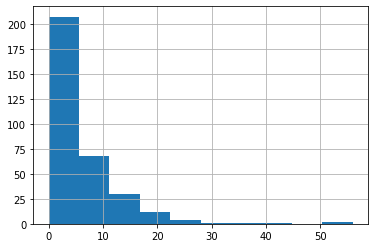

In [297]:
for_num_col(stud_math['absences'])

stud_math['absences'].unique()


# Столбец количества пропущенных занятий:
Пропусков в столбце не много, около 10. Есть выбросы - возможно это единичные прогульщики, их показатели могут сбивать будущую модель, так что думаю есть смысл от них избавиться. Верхней границей выброса возьму 40 пропусков, больше чем в формуле, т.к. много у кого больше 20 но меньше 40 пропусков.

<AxesSubplot:>

count    326.000000
mean      52.147239
std       22.401712
min        0.000000
25%       41.250000
50%       55.000000
75%       65.000000
max      100.000000
Name: score, dtype: float64

25-й перцентиль: 41.25, 75-й перцентиль: 65.0, IQR: 23.75,
Границы выбросов = [5.625, 100.625]


50.0     50
55.0     42
0.0      30
65.0     28
60.0     25
75.0     25
40.0     24
70.0     23
45.0     19
80.0     16
30.0     14
90.0     10
35.0      8
25.0      5
85.0      3
95.0      2
100.0     1
20.0      1
Name: score, dtype: int64

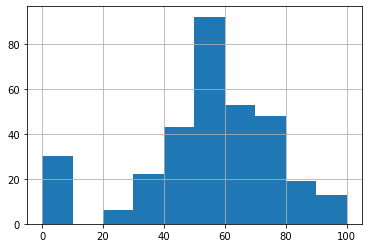

In [298]:
for_num_col(stud_math['score'])

stud_math['score'].value_counts()

# Столбец набранных баллов по экзамену:
Есть пару пропусков. Выбросов нет. График симметричный. Большинство учеников сдали экзамен средне. Этот столбец является для нас целевым, так что пропусков быть не должно.

In [299]:
stud_math.corr()

,age,Medu,Fedu,traveltime,studytime,failures,"studytime, granular",famrel,freetime,goout,health,absences,score
age,1.000000,-0.135115,-0.152193,0.064970,-0.022439,0.176290,0.022439,0.043593,-0.006911,0.071929,-0.062636,0.156020,-0.140704
Medu,-0.135115,1.000000,0.648857,-0.154519,0.080566,-0.193535,-0.080566,-0.023254,0.004574,0.072493,-0.097438,0.123462,0.203450
Fedu,-0.152193,0.648857,1.000000,-0.165287,-0.000716,-0.231940,0.000716,-0.031771,-0.019721,0.029747,-0.023760,0.068245,0.114783
traveltime,0.064970,-0.154519,-0.165287,1.000000,-0.116920,0.060220,0.116920,-0.061385,0.009030,0.019427,-0.032638,-0.045136,-0.062993
studytime,-0.022439,0.080566,-0.000716,-0.116920,1.000000,-0.132963,-1.000000,0.021887,-0.131594,-0.062756,-0.078870,-0.052771,0.111526
failures,0.176290,-0.193535,-0.231940,0.060220,-0.132963,1.000000,0.132963,0.025032,0.094625,0.092761,0.058052,0.071674,-0.279351
"studytime, granular",0.022439,-0.080566,0.000716,0.116920,-1.000000,0.132963,1.000000,-0.021887,0.131594,0.062756,0.078870,0.052771,-0.111526
famrel,0.043593,-0.023254,-0.031771,-0.061385,0.021887,0.025032,-0.021887,1.000000,0.164395,0.075671,0.114476,-0.034564,0.044338
freetime,-0.006911,0.004574,-0.019721,0.009030,-0.131594,0.094625,0.131594,0.164395,1.000000,0.283774,0.091444,-0.024491,0.014663
goout,0.071929,0.072493,0.029747,0.019427,-0.062756,0.092761,0.062756,0.075671,0.283774,1.000000,-0.003808,0.051960,-0.139746


,school
GP,288
MS,38


'Количество непустых значений = 326'

<AxesSubplot:>

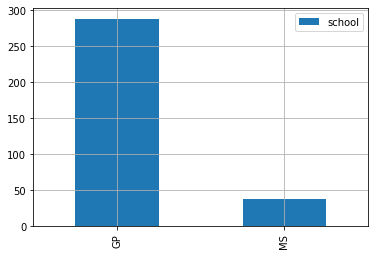

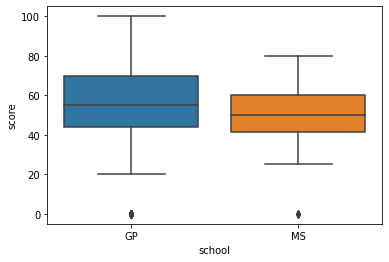

In [300]:
for_obj_col('school')


,sex
F,176
M,150


'Количество непустых значений = 326'

<AxesSubplot:>

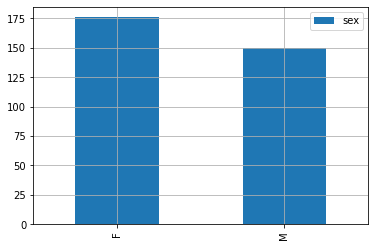

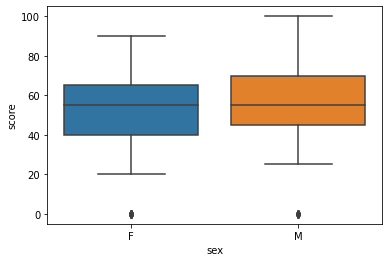

In [301]:
for_obj_col('sex')

,address
U,256
R,70


'Количество непустых значений = 326'

<AxesSubplot:>

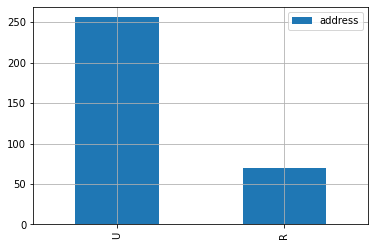

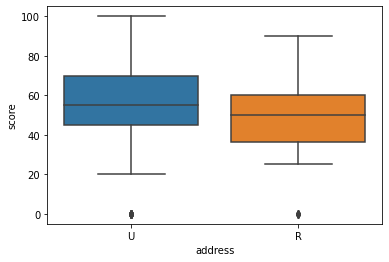

In [304]:
stud_math['address'] = stud_math['address'].apply(lambda x: stud_math['address'].mode()[0] if pd.isna(x) else x)
for_obj_col('address')


,famsize
GT3,238
LE3,88


'Количество непустых значений = 326'

<AxesSubplot:>

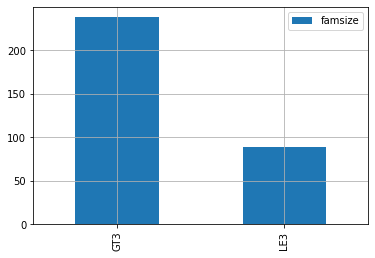

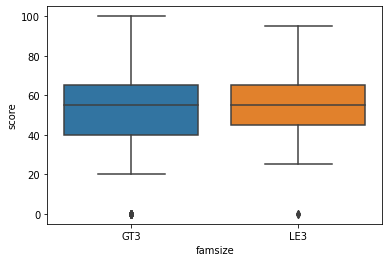

In [305]:
stud_math['famsize'] = stud_math['famsize'].apply(lambda x: stud_math['famsize'].mode()[0] if pd.isna(x) else x)
for_obj_col('famsize')

,Pstatus
T,299
A,27


'Количество непустых значений = 326'

<AxesSubplot:>

array(['A', 'T'], dtype=object)

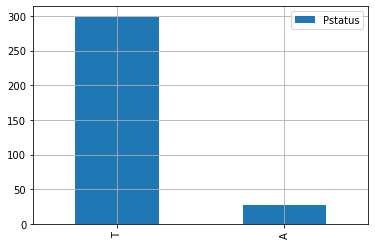

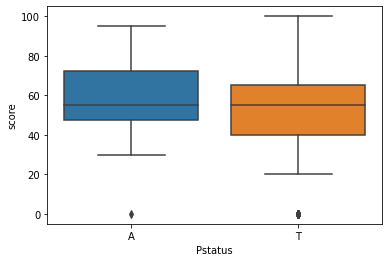

In [306]:
stud_math['Pstatus'] = stud_math['Pstatus'].apply(lambda x: stud_math['Pstatus'].mode()[0] if pd.isna(x) else x)
for_obj_col('Pstatus')
stud_math['Pstatus'].unique()

,Mjob
other,126
services,77
at_home,51
teacher,43
health,29


'Количество непустых значений = 326'

<AxesSubplot:>

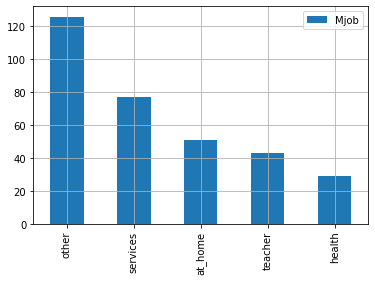

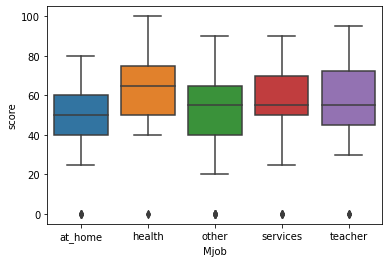

In [307]:
stud_math['Mjob'] = stud_math['Mjob'].apply(lambda x: stud_math['Mjob'].mode()[0] if pd.isna(x) else x)
for_obj_col('Mjob')

,Fjob
other,197
services,82
teacher,23
at_home,14
health,10


'Количество непустых значений = 326'

<AxesSubplot:>

array(['teacher', 'other', 'health', 'services', 'at_home'], dtype=object)

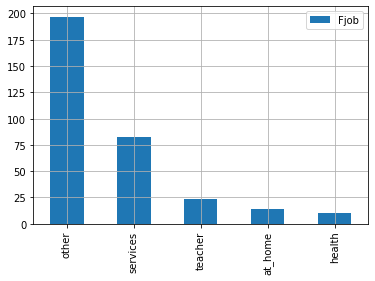

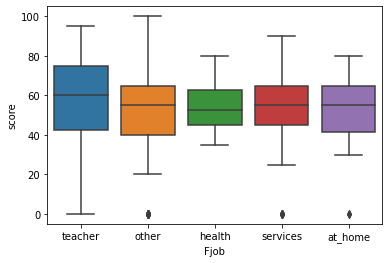

In [308]:
stud_math['Fjob'] = stud_math['Fjob'].apply(lambda x: stud_math['Fjob'].mode()[0] if pd.isna(x) else x)
for_obj_col('Fjob')
stud_math['Fjob'].unique()

,reason
course,121
reputation,88
home,87
other,30


'Количество непустых значений = 326'

<AxesSubplot:>

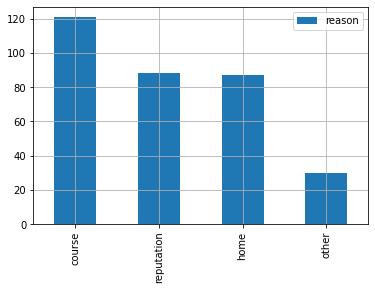

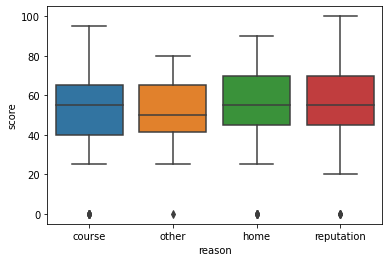

In [309]:
stud_math['reason'] = stud_math['reason'].apply(lambda x: stud_math['reason'].mode()[0] if pd.isna(x) else x)
for_obj_col('reason')


,guardian
mother,235
father,70
other,21


'Количество непустых значений = 326'

<AxesSubplot:>

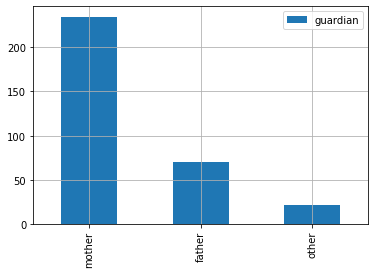

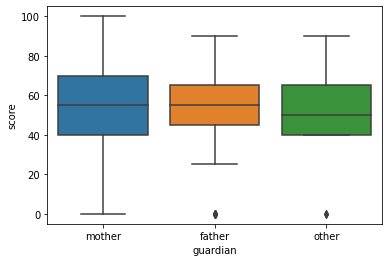

In [310]:
stud_math['guardian'] = stud_math['guardian'].apply(lambda x: stud_math['guardian'].mode()[0] if pd.isna(x) else x)
for_obj_col('guardian')

,schoolsup
no,286
yes,40


'Количество непустых значений = 326'

<AxesSubplot:>

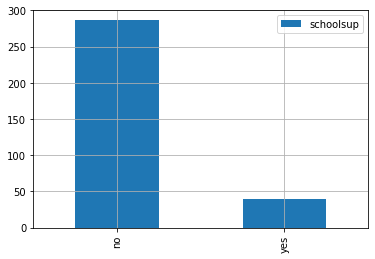

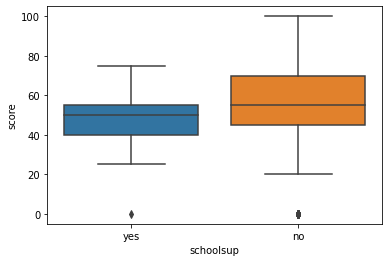

In [311]:
stud_math['schoolsup'] = stud_math['schoolsup'].apply(lambda x: stud_math['schoolsup'].mode()[0] if pd.isna(x) else x)
for_obj_col('schoolsup')

,famsup
yes,210
no,116


'Количество непустых значений = 326'

<AxesSubplot:>

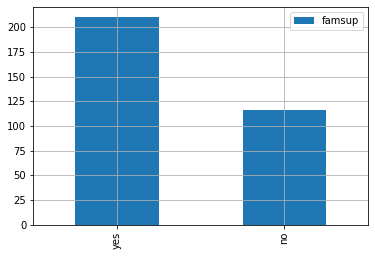

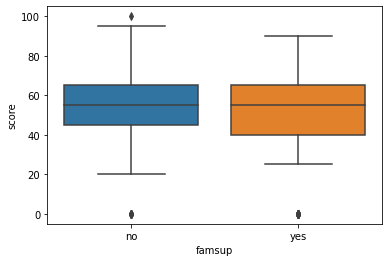

In [312]:
stud_math['famsup'] = stud_math['famsup'].apply(lambda x: stud_math['famsup'].mode()[0] if pd.isna(x) else x)
for_obj_col('famsup')

,paid
no,163
yes,127


'Количество непустых значений = 290'

<AxesSubplot:>

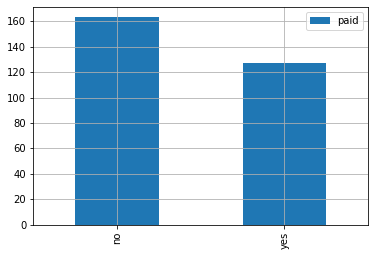

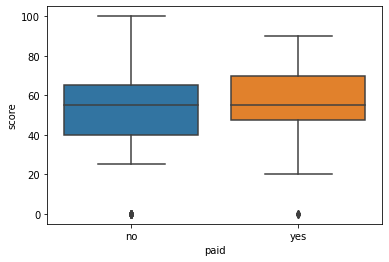

In [179]:
for_obj_col('paid')

,activities
yes,159
no,152


'Количество непустых значений = 311'

<AxesSubplot:>

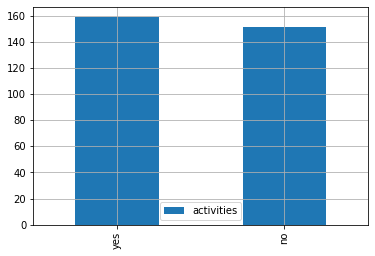

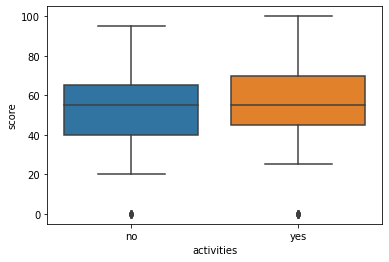

In [180]:
for_obj_col('activities')

,nursery
yes,262
no,64


'Количество непустых значений = 326'

<AxesSubplot:>

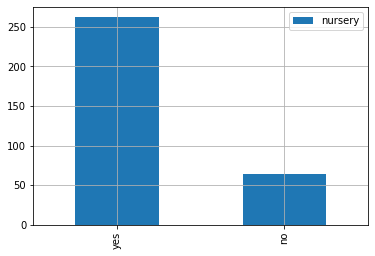

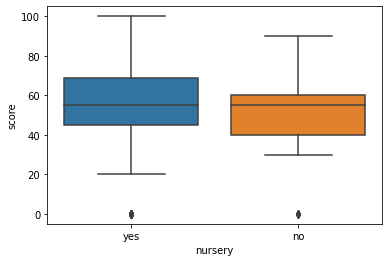

In [313]:
stud_math['nursery'] = stud_math['nursery'].apply(lambda x: stud_math['nursery'].mode()[0] if pd.isna(x) else x)
for_obj_col('nursery')

,higher
yes,311
no,15


'Количество непустых значений = 326'

<AxesSubplot:>

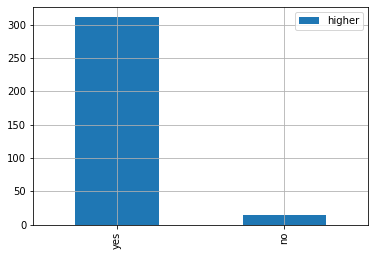

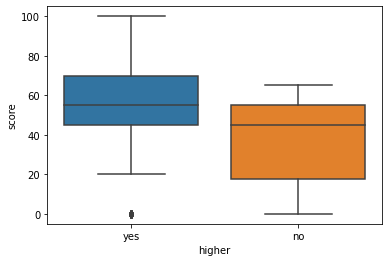

In [314]:
stud_math['higher'] = stud_math['higher'].apply(lambda x: stud_math['higher'].mode()[0] if pd.isna(x) else x)
for_obj_col('higher')

,internet
yes,278
no,48


'Количество непустых значений = 326'

<AxesSubplot:>

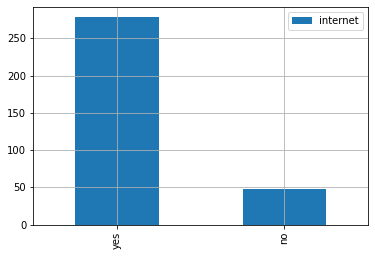

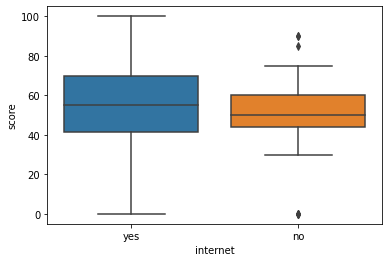

In [315]:
stud_math['internet'] = stud_math['internet'].apply(lambda x: stud_math['internet'].mode()[0] if pd.isna(x) else x)
for_obj_col('internet')

,romantic
no,224
yes,102


'Количество непустых значений = 326'

<AxesSubplot:>

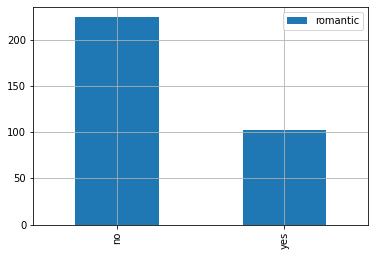

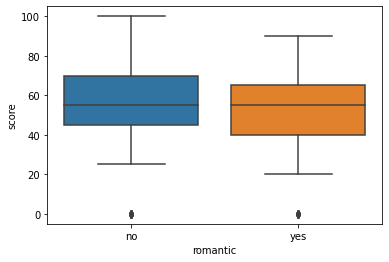

In [316]:
stud_math['romantic'] = stud_math['romantic'].apply(lambda x: stud_math['romantic'].mode()[0] if pd.isna(x) else x)
for_obj_col('romantic')

<ipython-input-97-c8b2e1382e84>:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


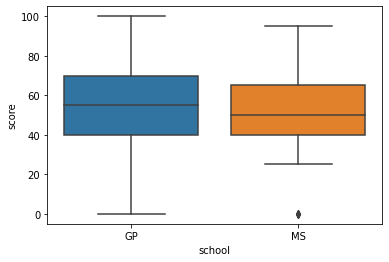

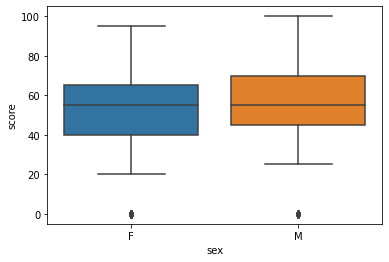

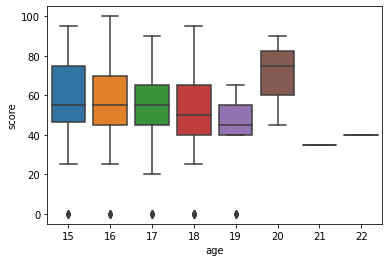

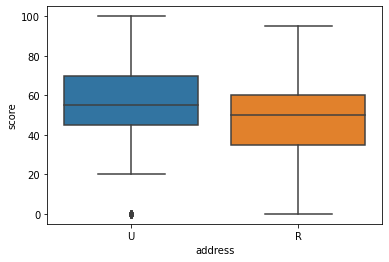

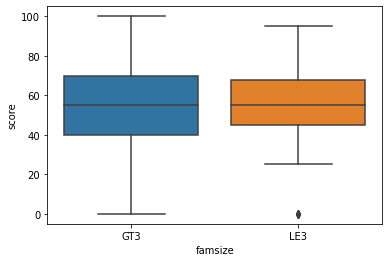

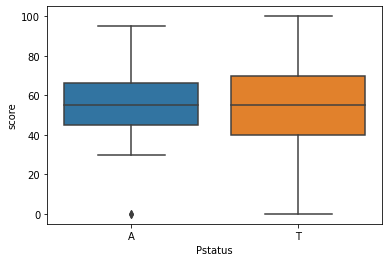

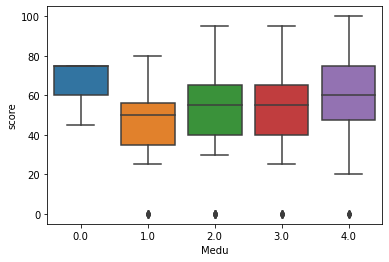

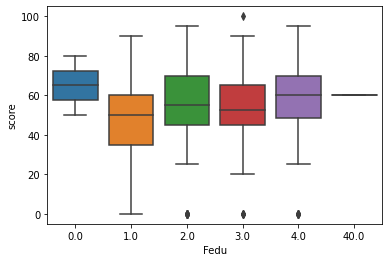

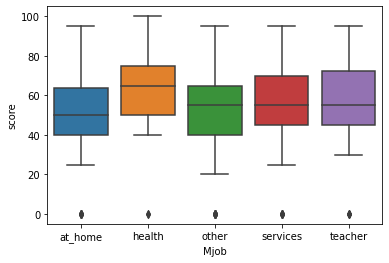

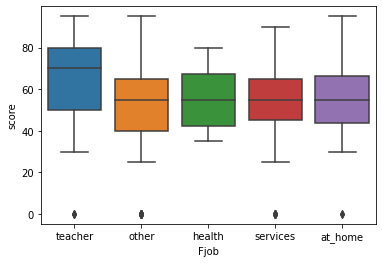

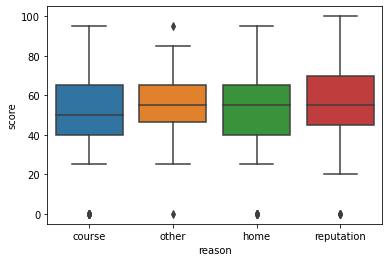

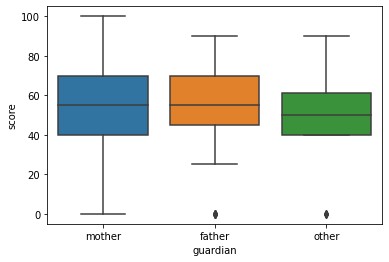

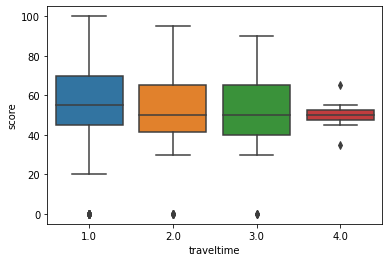

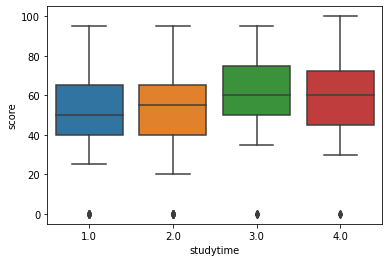

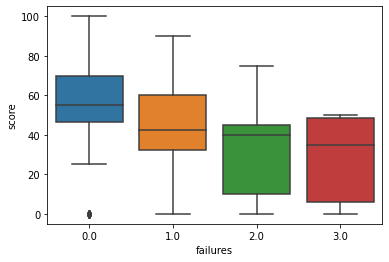

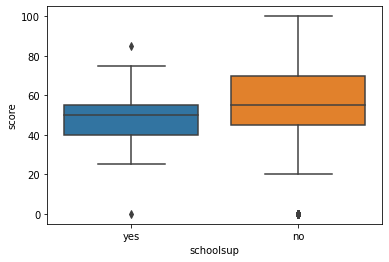

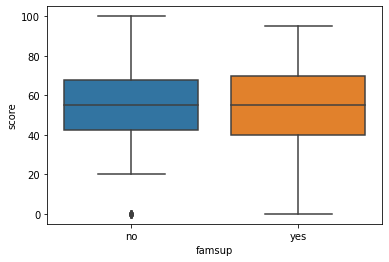

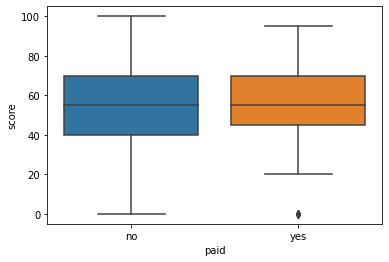

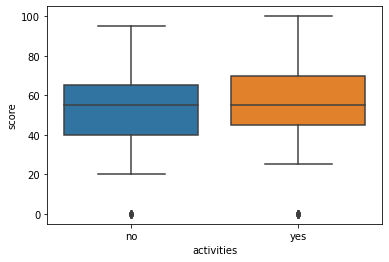

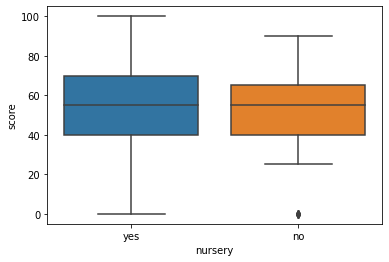

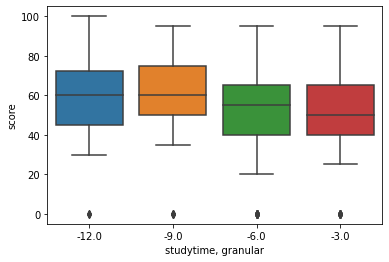

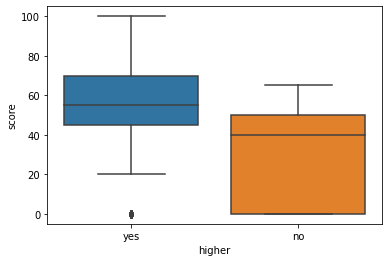

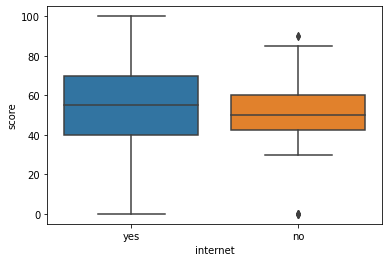

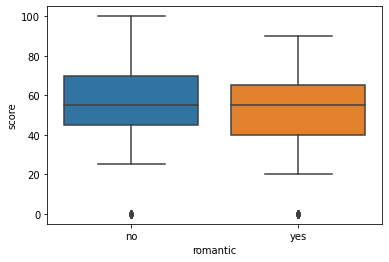

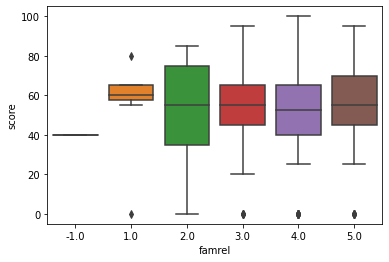

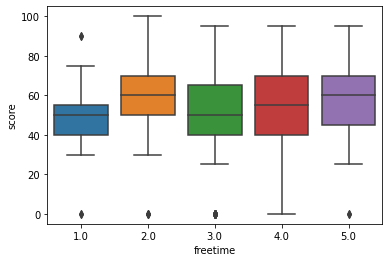

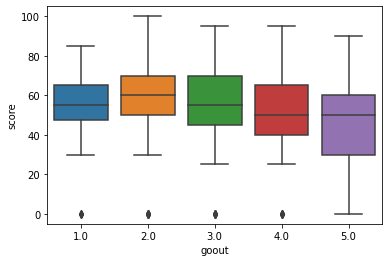

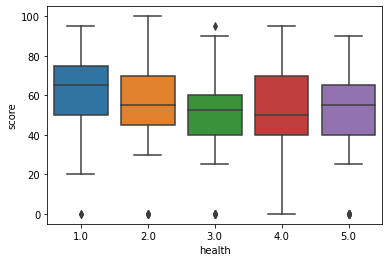

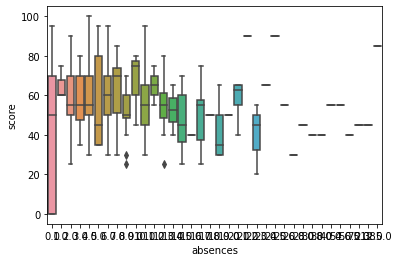

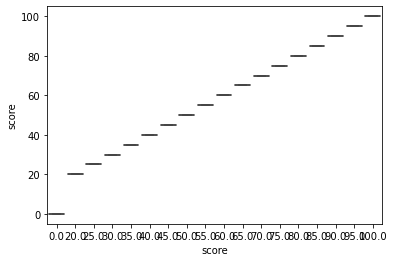

In [97]:
def boxplt(c):
    fig, ax = plt.subplots()
    sns.boxplot(x=c, y='score', data=stud_math, ax=ax)
    
for col in stud_math.columns:
    boxplt(col)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,NaN,A,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,0.0,yes,no,no,no,yes,-6.0,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,NaN,1.0,1.0,at_home,other,course,father,1.0,2.0,0.0,no,yes,no,no,no,-6.0,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,other,mother,1.0,2.0,3.0,yes,no,NaN,no,yes,-6.0,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,NaN,home,mother,1.0,3.0,0.0,no,yes,yes,yes,yes,-9.0,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,home,father,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2.0,2.0,services,services,course,NaN,1.0,2.0,2.0,no,yes,yes,no,yes,-6.0,yes,no,no,5.0,5.0,4.0,4.0,212.0,45.0
391,MS,M,17,U,LE3,T,3.0,1.0,services,services,course,mother,2.0,1.0,0.0,no,no,no,no,no,-3.0,yes,yes,no,2.0,4.0,5.0,2.0,3.0,80.0
392,MS,M,21,R,GT3,T,1.0,1.0,other,other,course,NaN,1.0,1.0,3.0,NaN,no,no,no,no,-3.0,NaN,no,no,5.0,5.0,3.0,3.0,3.0,35.0
393,MS,M,18,R,LE3,T,3.0,2.0,services,other,course,mother,3.0,1.0,0.0,no,no,no,NaN,no,-3.0,yes,yes,no,4.0,4.0,1.0,5.0,0.0,50.0


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,NaN,A,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,0.0,yes,no,no,no,yes,-6.0,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,NaN,1.0,1.0,at_home,other,course,father,1.0,2.0,0.0,no,yes,no,no,no,-6.0,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,other,mother,1.0,2.0,3.0,yes,no,NaN,no,yes,-6.0,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,NaN,home,mother,1.0,3.0,0.0,no,yes,yes,yes,yes,-9.0,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,home,father,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2.0,2.0,services,services,course,NaN,1.0,2.0,2.0,no,yes,yes,no,yes,-6.0,yes,no,no,5.0,5.0,4.0,4.0,212.0,45.0
391,MS,M,17,U,LE3,T,3.0,1.0,services,services,course,mother,2.0,1.0,0.0,no,no,no,no,no,-3.0,yes,yes,no,2.0,4.0,5.0,2.0,3.0,80.0
392,MS,M,21,R,GT3,T,1.0,1.0,other,other,course,NaN,1.0,1.0,3.0,NaN,no,no,no,no,-3.0,NaN,no,no,5.0,5.0,3.0,3.0,3.0,35.0
393,MS,M,18,R,LE3,T,3.0,2.0,services,other,course,mother,3.0,1.0,0.0,no,no,no,NaN,no,-3.0,yes,yes,no,4.0,4.0,1.0,5.0,0.0,50.0


In [317]:
stud_math.corr()

,age,Medu,Fedu,traveltime,studytime,failures,"studytime, granular",famrel,freetime,goout,health,absences,score
age,1.000000,-0.135115,-0.152193,0.064970,-0.022439,0.176290,0.022439,0.043593,-0.006911,0.071929,-0.062636,0.156020,-0.140704
Medu,-0.135115,1.000000,0.648857,-0.154519,0.080566,-0.193535,-0.080566,-0.023254,0.004574,0.072493,-0.097438,0.123462,0.203450
Fedu,-0.152193,0.648857,1.000000,-0.165287,-0.000716,-0.231940,0.000716,-0.031771,-0.019721,0.029747,-0.023760,0.068245,0.114783
traveltime,0.064970,-0.154519,-0.165287,1.000000,-0.116920,0.060220,0.116920,-0.061385,0.009030,0.019427,-0.032638,-0.045136,-0.062993
studytime,-0.022439,0.080566,-0.000716,-0.116920,1.000000,-0.132963,-1.000000,0.021887,-0.131594,-0.062756,-0.078870,-0.052771,0.111526
failures,0.176290,-0.193535,-0.231940,0.060220,-0.132963,1.000000,0.132963,0.025032,0.094625,0.092761,0.058052,0.071674,-0.279351
"studytime, granular",0.022439,-0.080566,0.000716,0.116920,-1.000000,0.132963,1.000000,-0.021887,0.131594,0.062756,0.078870,0.052771,-0.111526
famrel,0.043593,-0.023254,-0.031771,-0.061385,0.021887,0.025032,-0.021887,1.000000,0.164395,0.075671,0.114476,-0.034564,0.044338
freetime,-0.006911,0.004574,-0.019721,0.009030,-0.131594,0.094625,0.131594,0.164395,1.000000,0.283774,0.091444,-0.024491,0.014663
goout,0.071929,0.072493,0.029747,0.019427,-0.062756,0.092761,0.062756,0.075671,0.283774,1.000000,-0.003808,0.051960,-0.139746


[92, 193, 239]

92    NaN
193   NaN
239   NaN
Name: Medu, dtype: float64

In [230]:
for_medu(stud_math['Medu'])

0      4.0
1      1.0
2      1.0
3      4.0
4      3.0
      ... 
389    1.0
391    3.0
392    1.0
393    3.0
394    1.0
Name: Medu, Length: 323, dtype: float64

92     1.0
193    3.0
239    2.0
Name: Fedu, dtype: float64